<a href="https://colab.research.google.com/github/diemasariasena/Project-Data-Diemas/blob/main/Project_2_Sales_Transaction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cohort Analysis Menggunakan Python

File excel didapat dari 

## Menampilkan Data

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive

In [3]:
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = pd.read_excel(r'/content/gdrive/My Drive/Sales-Transaction.xlsx')
data.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12,13069.0,United Kingdom
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12,13069.0,United Kingdom
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [6]:
#drops rows with number customer id
data = data.dropna(subset=['CustomerNo'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536295 non-null  object 
 1   Date           536295 non-null  object 
 2   ProductNo      536295 non-null  object 
 3   ProductName    536295 non-null  object 
 4   Price          536295 non-null  float64
 5   Quantity       536295 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536295 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


## Reformat Timestamp

In [7]:
import dateutil
from datetime import datetime as dt
from pytz import utc

data['datetime'] = data['Date'].apply(lambda x: dateutil.parser.parse(x).timestamp())
data['month'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).month)
data['year'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).year)

In [8]:
data.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,datetime,month,year
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,1.575850e+09,12,2019
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,1.575850e+09,12,2019
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,1.575850e+09,12,2019
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,1.575850e+09,12,2019
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,1.575850e+09,12,2019
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom,1.575850e+09,12,2019
6,581475,12/9/2019,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom,1.575850e+09,12,2019
7,581475,12/9/2019,22119,Peace Wooden Block Letters,12.25,12,13069.0,United Kingdom,1.575850e+09,12,2019
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,10.65,12,13069.0,United Kingdom,1.575850e+09,12,2019
9,581475,12/9/2019,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom,1.575850e+09,12,2019


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536295 non-null  object 
 1   Date           536295 non-null  object 
 2   ProductNo      536295 non-null  object 
 3   ProductName    536295 non-null  object 
 4   Price          536295 non-null  float64
 5   Quantity       536295 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536295 non-null  object 
 8   datetime       536295 non-null  float64
 9   month          536295 non-null  int64  
 10  year           536295 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 49.1+ MB


## Membuat cohort

In [10]:
# 'AUG 2010'
# '2010 AUG'
# AUG 2010 -> 201008

data['cohort'] = data.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1)
# 2010 * 100 = 201000 
# aug -> 201000 + 08 = 201008

cohorts = data.groupby('CustomerNo')['cohort'].min().reset_index()
cohorts.columns = ['CustomerNo', 'first_cohort']

data = data.merge(cohorts, on='CustomerNo', how='left')

In [11]:
cohorts.head()

,CustomerNo,first_cohort
0,12004.0,201904
1,12006.0,201905
2,12008.0,201903
3,12013.0,201812
4,12024.0,201906


In [12]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,datetime,month,year,cohort,first_cohort
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,1.575850e+09,12,2019,201912,201906
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812


## Membuat header untuk setiap cohort

In [13]:
headers = data['cohort'].value_counts().reset_index()
headers.columns = ['Cohorts', 'Count']
headers.head()
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()

In [14]:
headers

[201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912]

## Pivot data berdasarkan cohort

In [15]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,datetime,month,year,cohort,first_cohort
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,1.575850e+09,12,2019,201912,201906
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812


In [16]:
data.dropna(inplace=True)

In [17]:
data['cohort_distance'] = data.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])) if (row['first_cohort'] != 0 and row['cohort'] != 0) else np.nan, axis=1)

In [18]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,datetime,month,year,cohort,first_cohort,cohort_distance
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,1.575850e+09,12,2019,201912,201906,6
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812,12
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812,12
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812,12
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,1.575850e+09,12,2019,201912,201812,12


In [19]:
cohort_pivot = pd.pivot_table(data,
                              index='first_cohort',
                              columns='cohort_distance',
                              values='CustomerNo',
                              aggfunc=pd.Series.nunique)

In [20]:
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
201812,1086.0,380.0,341.0,396.0,375.0,407.0,397.0,373.0,355.0,412.0,396.0,521.0,275.0
201901,487.0,107.0,134.0,120.0,151.0,143.0,119.0,120.0,143.0,161.0,169.0,73.0,NaN
201902,432.0,103.0,80.0,112.0,114.0,99.0,106.0,117.0,106.0,134.0,38.0,NaN,NaN
201903,492.0,87.0,111.0,98.0,115.0,85.0,125.0,116.0,144.0,46.0,NaN,NaN,NaN
201904,319.0,69.0,64.0,62.0,64.0,76.0,71.0,83.0,29.0,NaN,NaN,NaN,NaN
201905,328.0,73.0,61.0,54.0,71.0,76.0,83.0,30.0,NaN,NaN,NaN,NaN,NaN
201906,267.0,55.0,47.0,60.0,64.0,76.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
201907,209.0,36.0,37.0,45.0,64.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201908,172.0,39.0,41.0,41.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cohort_pivot = cohort_pivot.div(cohort_pivot[0],axis=0)

In [22]:
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
201812,1.0,0.349908,0.313996,0.364641,0.345304,0.374770,0.365562,0.343462,0.326888,0.379374,0.364641,0.479742,0.253223
201901,1.0,0.219713,0.275154,0.246407,0.310062,0.293634,0.244353,0.246407,0.293634,0.330595,0.347023,0.149897,NaN
201902,1.0,0.238426,0.185185,0.259259,0.263889,0.229167,0.245370,0.270833,0.245370,0.310185,0.087963,NaN,NaN
201903,1.0,0.176829,0.225610,0.199187,0.233740,0.172764,0.254065,0.235772,0.292683,0.093496,NaN,NaN,NaN
201904,1.0,0.216301,0.200627,0.194357,0.200627,0.238245,0.222571,0.260188,0.090909,NaN,NaN,NaN,NaN
201905,1.0,0.222561,0.185976,0.164634,0.216463,0.231707,0.253049,0.091463,NaN,NaN,NaN,NaN,NaN
201906,1.0,0.205993,0.176030,0.224719,0.239700,0.284644,0.112360,NaN,NaN,NaN,NaN,NaN,NaN
201907,1.0,0.172249,0.177033,0.215311,0.306220,0.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201908,1.0,0.226744,0.238372,0.238372,0.127907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Menampilkan data dalam bentuk heatmap

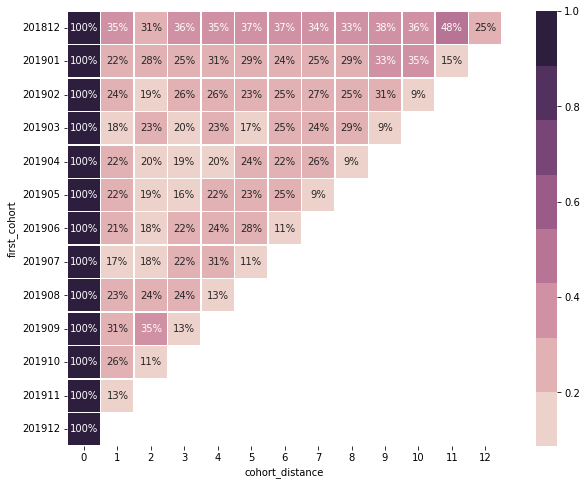

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(8))

plt.show()